# **Background and foreground separation with robust PCA**

In this notebook, we'll see how to use RPCA algorithms to extract the background and foreground of a video.


First, import some usefull libraries and functions

In [7]:
%reload_ext autoreload
%autoreload 2

from utils import utils_images, drawing
from classes.rpca import RPCA
from classes.improved_rpca import ImprovedRPCA, ImprovedRPCAHyperparams
from classes.noisy_rpca import NoisyRPCA, NoisyRPCAHyperparams

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.grid"] = False
import moviepy.editor as mpe
import os

Load the video

In [4]:
video = mpe.VideoFileClip('../data/toy_video.mp4')

The initial resolution is too heavy to deal with. So, we choose to rescale the images. In this way, an image from one moment in time is resized in 120 pixels by 160 pixels (iwith this particular video and with the scale 25).

In [5]:
scale = 25   # Adjust scale to change resolution of image
dims = (int(480 * (scale/100)), int(640 * (scale/100)))

The idea is to transform a video into a matrix, for which it will be posible to differentiate the *background* from the *foreground*. To do so, we extract the images from the video every hundredths of a second; these images are rescaled and unfolded to form column-vectors of dimension $(120 \times 160, 1)$. We then stack them all and eventually get a matrix of dimension $(120 \times 160, video.duration \times 100)$. This final matrix represent the video.

In [9]:
if os.path.exists("../data/toy_video_low_res.npy"):
    M = np.load("../data/toy_video_low_res.npy")
    dimension = dims
else:
    M, dimension = utils_images.video2matrix(video, 100, scale)
    np.save("../data/toy_video_low_res.npy", M)

The matrix looks like a that. One can see horizontal lines and some curves. The latter are the *anomalies* to detect and represent the moving cars on a static background. To get an idea of one frame, we can reshape a column.

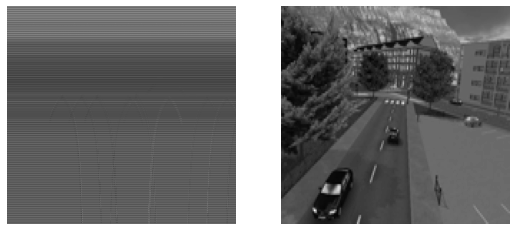

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].imshow(M, cmap="gray", aspect="auto")
ax[1].imshow(np.reshape(M[:,2800], dims), cmap="gray", aspect="auto")
for x in ax.ravel():
    x.axis("off")
plt.show()

We now apply a RPCA algorithm. 
**!! WARNING !! this is a very slow process.**

In [8]:
%%time

D, X, A = RPCA(D=M).compute_rpca()
np.save("../data/matrixX.npy", X)
np.save("../data/matrixA.npy", A)

In [6]:
X = np.load('../data/matrixX.npy')
A = np.load('../data/matrixA.npy')

For a first glimpse, we select some frames to see how the RPCA has detected the moving objects. 

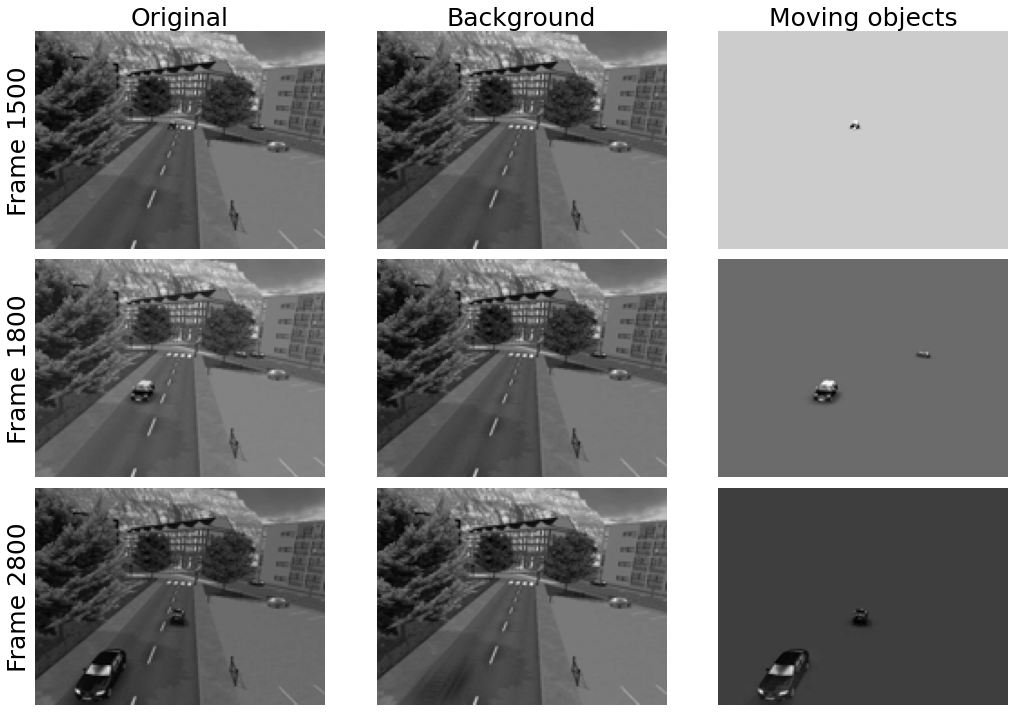

In [27]:
f = drawing.plot_images(M[:,:3_000], X, A, [1500, 1800, 2800], dimension)